In [1]:
# 整理数据的库
import numpy as np
import pandas as pd
import pyreadstat #读取sav格式文件需要
# 数据可视化的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# 数据分析的库
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # 回归分析
from scipy.stats import chi2_contingency #卡方检验
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd #事后检验
# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告

In [2]:
df_1,meta_1 = pyreadstat.read_sav("D:\\data\\CGSS\\CGSS2021.sav") #dataframe的值为纯数字

In [3]:
df_2,meta_2 = pyreadstat.read_sav(r"D:\data\CGSS\CGSS2021.sav",apply_value_formats=True)# dataframe的值为元信息
#注意：李克特计分方法的变量pyreadstat认定为类别型变量，这个和我们的需求是不同的

In [4]:
df_1.head()

,id,provinces,community_i,type,A00,A1,A011601,A011602,A011603,A011604,...,P22_b,P22_c,isco08_a57e,isco08_a59d,isco08_a60d,isco08_sp,isco08_f,isco08_m,weight,weight_raking
0,2504.0,北京市,1101021,1.0,2021-07-11 15:03:00,1.0,2.0,NaN,NaN,NaN,...,4.0,1.0,2342.0,5322.0,NaN,NaN,3341.0,9622.0,0.757877,0.265570
1,1187.0,北京市,1101022,1.0,2021-07-06 11:14:00,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,7230.0,NaN,1321.0,NaN,1112.0,NaN,0.416885,0.073736
2,4315.0,北京市,1101011,1.0,2021-07-20 16:05:00,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,2330.0,NaN,7521.0,6100.0,0.299796,0.023887
3,6836.0,北京市,1101154,1.0,2021-07-31 15:18:00,7.0,3.0,3.0,5.0,5.0,...,NaN,NaN,7230.0,2523.0,NaN,4110.0,8300.0,2341.0,0.781762,0.274609
4,4726.0,北京市,1101064,1.0,2021-07-23 09:22:00,4.0,1.0,2.0,6.0,7.0,...,1.0,2.0,7318.0,NaN,4110.0,NaN,7230.0,NaN,0.616473,0.215613


In [5]:
df_1.columns

Index(['id', 'provinces', 'community_i', 'type', 'A00', 'A1', 'A011601',
       'A011602', 'A011603', 'A011604',
       ...
       'P22_b', 'P22_c', 'isco08_a57e', 'isco08_a59d', 'isco08_a60d',
       'isco08_sp', 'isco08_f', 'isco08_m', 'weight', 'weight_raking'],
      dtype='object', length=700)

In [6]:
df_2

,id,provinces,community_i,type,A00,A1,A011601,A011602,A011603,A011604,...,P22_b,P22_c,isco08_a57e,isco08_a59d,isco08_a60d,isco08_sp,isco08_f,isco08_m,weight,weight_raking
0,2504.0,北京市,1101021,居委会,2021-07-11 15:03:00,1.0,子女,NaN,NaN,NaN,...,有很大影响,根本没有影响,幼教教师,居家个人护理工作人员,NaN,NaN,办公室主管,零工,0.757877,0.265570
1,1187.0,北京市,1101022,居委会,2021-07-06 11:14:00,1.0,配偶,NaN,NaN,NaN,...,NaN,NaN,机械装配和修理工,NaN,制造业经理,NaN,高级政府官员,NaN,0.416885,0.073736
2,4315.0,北京市,1101011,居委会,2021-07-20 16:05:00,1.0,配偶,NaN,NaN,NaN,...,NaN,NaN,军职人员,NaN,中学教师,NaN,木材处理工人,面向市场的熟练农业工作人员,0.299796,0.023887
3,6836.0,北京市,1101154,居委会,2021-07-31 15:18:00,7.0,父母,父母,兄弟姐妹,兄弟姐妹,...,NaN,NaN,机械装配和修理工,计算机网络专业人员,NaN,一般办公室工作人员,驾驶和移动设备操作员,小学教师,0.781762,0.274609
4,4726.0,北京市,1101064,居委会,2021-07-23 09:22:00,4.0,配偶,子女,女婿/儿媳,祖父母/外祖父母,...,根本没有影响,有一点影响,纺织、皮革及相关材料的手工艺工人,NaN,一般办公室工作人员,NaN,机械装配和修理工,NaN,0.616473,0.215613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,6215.0,宁夏回族自治区,6403241,居委会,2021-07-28 11:31:00,3.0,父母,父母,兄弟姐妹,NaN,...,有一点影响,根本没有影响,不知道,NaN,NaN,NaN,未分类的简单劳动工作人员,农业、林业、牧业、渔业熟练工作人员,1.587054,2.703331
8144,7068.0,宁夏回族自治区,6403243,村委会,2021-08-03 10:31:00,6.0,配偶,子女,女婿/儿媳,孙子（女）/外孙子（女）,...,有一点影响,有一些影响,不适用,NaN,NaN,NaN,NaN,面向市场的熟练农业工作人员,0.292696,0.133989
8145,6625.0,宁夏回族自治区,6403241,居委会,2021-07-29 12:56:00,3.0,配偶,子女,子女,NaN,...,NaN,NaN,不知道,不知道,NaN,不知道,不知道,不知道,1.500252,0.897839
8146,6659.0,宁夏回族自治区,6403241,居委会,2021-07-29 11:24:00,3.0,配偶,子女,子女,NaN,...,NaN,NaN,护理专业人员,护理和助产专业技术人员,NaN,一般办公室工作人员,泥水匠,NaN,0.767249,0.221671


# 数据清洗

将特定的一些值变成空值

In [60]:
# 定义函数，replace_values
def replace_values(series, target_values):
    """
    将series中的特定数值替换为空值
    :param series: 要处理的Series
    :param target_values: 要替换为空值的特定数值的列表
    :return: 处理后的Series
    """
    return series.apply(lambda x: None if x in target_values else x)

In [64]:
target_values_to_replace =[98,99]
df_1['A15'] = replace_values(df_1['A15'], target_values_to_replace)


In [19]:
df_1.A15.describe()

count    8142.000000
mean        3.481577
std         1.093174
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: A15, dtype: float64

收入变量（A8a, A8b）的处理

In [70]:
target_values_to_replace =[9999996,9999997,9999998,9999999]
df_1.A8a = replace_values(df_1.A8a, target_values_to_replace)

构造虚拟变量

In [117]:
# 定义函数，replace_values
def create_dummy(series, target_values):
    """
    将series中的特定数值替换为0，否则替换为1
    :param series: 要处理的Series
    :param target_values: 要替换为空值的特定数值的列表
    :return: 处理后的Series
    """
    return series.apply(lambda x: 1 if x in target_values else 0)

In [119]:
# 1:抽烟，2，3：不抽烟 (变量E18)
#1→1
#2,3→0

list = [1]
df_1.E18 = create_dummy(df_1.E18,list)

## 多列变量进行处理

In [66]:
# 将第328~333列的变量处理
for i in range(327,333):
    df_1.iloc[:,i] = replace_values(df_1.iloc[:,i], target_values_to_replace)

In [67]:
df_2.A15

0        很健康
1        很健康
2       比较健康
3       比较健康
4       比较健康
        ... 
8143      一般
8144    很不健康
8145     很健康
8146     很健康
8147      一般
Name: A15, Length: 8148, dtype: category
Categories (6, object): ['一般', '不知道', '很不健康', '很健康', '比较不健康', '比较健康']

In [38]:
df_2.iloc[:,327]

0       非常不应该
1       非常不应该
2         4.0
3         3.0
4        非常应该
        ...  
8143      2.0
8144      4.0
8145    非常不应该
8146      4.0
8147      2.0
Name: C103_1, Length: 8148, dtype: category
Categories (5, object): [2.0, 3.0, 4.0, '非常不应该', '非常应该']

## 转成类别型变量

In [54]:
df_1.A2 = df_1.A2.astype('category')

# 计算新变量

性别观念：列变量328和329

In [43]:
df_1["gender_ideology"] = (df_1.iloc[:,327] + df_1.iloc[:,328])/2

In [51]:
df_1.groupby("A2").C2_C205.mean()

A2
1.0    2.850685
2.0    2.975936
Name: C2_C205, dtype: float64

# 描述性统计

## 数值型变量

In [87]:
df_1["log_income"] = np.log(df_1.A8a)

<Axes: xlabel='log_income'>

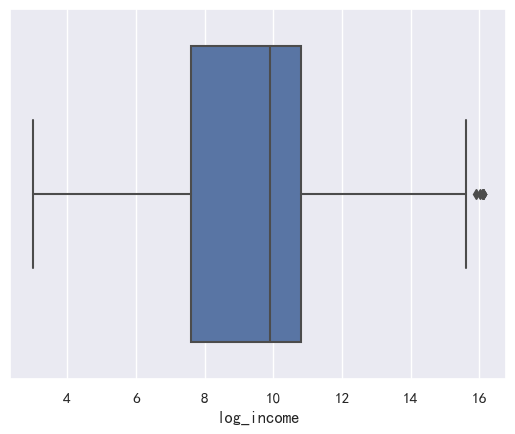

In [88]:
sns.boxplot(df_1,x="log_income")

In [90]:
df_1["log_income"]

0       11.472103
1       11.002100
2       11.472103
3       11.982929
4       10.778956
          ...    
8143     5.991465
8144     7.855545
8145    10.819778
8146    11.289782
8147         -inf
Name: log_income, Length: 8148, dtype: float64

## 类别型变量

In [115]:
#喝酒变量：E19


In [114]:
df_1.E19.value_counts()

5.0    1679
4.0     385
3.0     298
2.0     186
1.0     169
Name: E19, dtype: int64

In [116]:
df_1.E18.value_counts()

3.0    1824
1.0     613
2.0     280
Name: E18, dtype: int64

In [107]:
df_1.A7f

0        NaN
1        NaN
2       14.0
3       12.0
4        NaN
        ... 
8143     NaN
8144     NaN
8145     2.0
8146    10.0
8147     NaN
Name: A7f, Length: 8148, dtype: float64

<Axes: ylabel='count'>

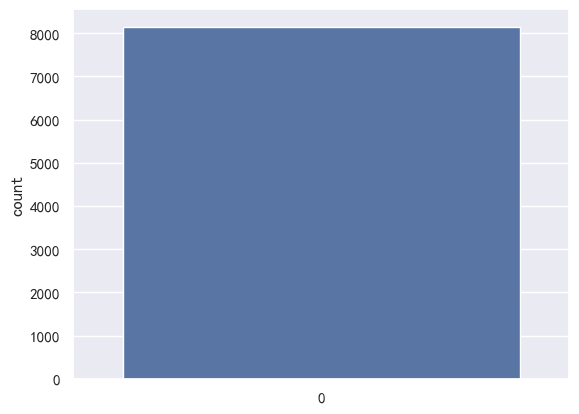

In [106]:
sns.countplot(df_1.A7f)

# 独立样本t检验

In [68]:
# 独立样本t检验结果（检验统计量t值，p值）
stats.ttest_ind(
    df_1["C2_C205"][df_1["A2"] == 1],
    df_1["C2_C205"][df_1["A2"] == 2],
)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [56]:
df_1["C2_C205"][df_1["A2"] == 1]

2       4.0
3       4.0
5       4.0
7       3.0
8       2.0
       ... 
8125    3.0
8136    2.0
8140    4.0
8142    4.0
8143    2.0
Name: C2_C205, Length: 3679, dtype: float64

In [57]:
 df_1["C2_C205"][df_1["A2"] == 2]

0       2.0
1       2.0
4       4.0
6       4.0
11      3.0
       ... 
8141    2.0
8144    2.0
8145    3.0
8146    3.0
8147    2.0
Name: C2_C205, Length: 4469, dtype: float64

<Axes: xlabel='A2', ylabel='C2_C205'>

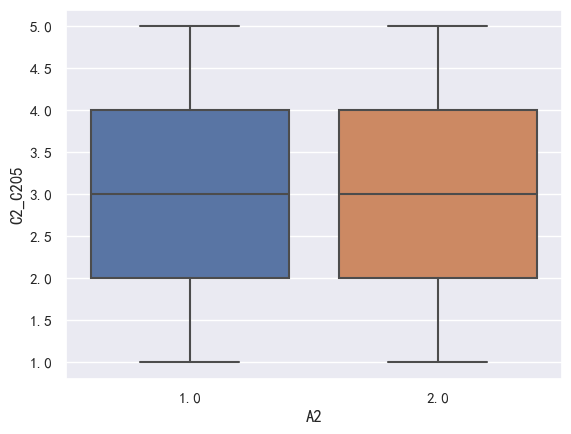

In [59]:
sns.boxplot(x = 'A2', y = 'C2_C205', data = df_1) 

抽烟的人和不抽烟的人收入有差异吗？

In [121]:
df_1.groupby("E18").A8a.mean()


E18
0    51502.348019
1    48135.499121
Name: A8a, dtype: float64

# 相关分析

In [108]:
df_1.E19

0       NaN
1       5.0
2       NaN
3       3.0
4       NaN
       ... 
8143    NaN
8144    NaN
8145    NaN
8146    NaN
8147    5.0
Name: E19, Length: 8148, dtype: float64

<Axes: xlabel='A8a', ylabel='C2_C205'>

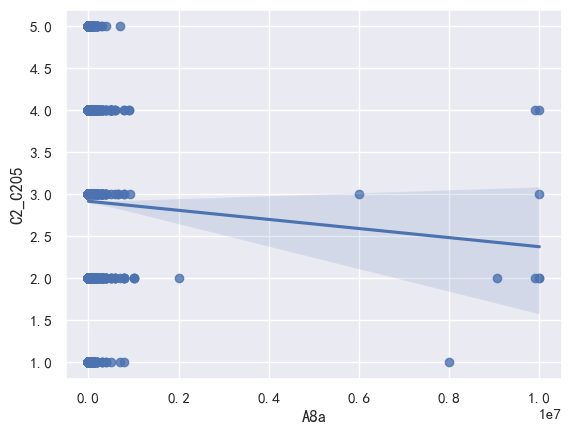

In [103]:
# 散点图（两变量）（包含拟合直线）
sns.regplot(x = "A8a", y = "C2_C205", data = df_1)